First notebook mostly used to download data + do exploration/visualizations





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from matplotlib import colors
import torch

Mount colab onto google drive, then copy dataset files into the notebook and unzip

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True) #add flag force_remount = True if needed

Mounted at /content/drive


In [5]:
!cp -rf "/content/drive/MyDrive/Midwest Datathon 2023 Team 11/Datasets/greenspace_data.zip" . #might need to change these lines
!cp -rf "/content/drive/MyDrive/Midwest Datathon 2023 Team 11/Datasets/health_datasets.zip" .
!cp -rf "/content/drive/MyDrive/Midwest Datathon 2023 Team 11/Datasets/census_code_mappers.zip" . 

In [6]:
!unzip -q greenspace_data.zip
!unzip -q health_datasets.zip
!unzip -q census_code_mappers.zip

Load data into pandas dataframes and figure out what's going on

In [7]:
#fivemil_dtypes = {'common_name': str, 'location_type': str, 'zipcode': float}
#fivemil_trees = pd.read_csv('/content/greenspace_data/5_million_trees_us_cities.csv', dtype = str) #read everything as str for now, figure out how to clean trash later
urban_tree_canopy = pd.read_csv('/content/greenspace_data/urban_tree_canopy.csv')

In [8]:
urban_tree_canopy.sample(10)

,city_name,census_block,mean_percent_tree_cover,tree_gap,surface_temp,income_percent,income_group,pop_dens_group
210963,"New Orleans, LA",2.207100e+14,0.403529,0.428253,30.095455,21192,2,2
232934,"San Jose, CA",6.085511e+13,0.174199,0.217591,33.204667,126436,4,1
696381,"Baltimore, MD",2.451027e+14,0.720487,0.700515,25.236813,94919,4,1
1794090,"San Diego, CA",6.073002e+13,0.002126,0.124848,37.159091,10012,1,2
1797107,"San Diego, CA",6.073008e+13,0.120435,0.092891,32.854530,27356,2,3
1255177,"New York--Newark, NY--NJ--CT",3.402581e+14,0.005464,0.196316,30.550000,58884,4,3
1025292,"Chicago, IL--IN",1.708985e+14,0.251949,0.272382,28.230000,33157,3,3
281930,"Dallas--Fort Worth--Arlington, TX",4.811301e+14,0.374512,0.367515,32.330000,19101,2,2
1542128,"Tampa--St. Petersburg, FL",1.205701e+14,0.063541,0.286445,29.031818,18325,1,2
1271162,"New York--Newark, NY--NJ--CT",3.605940e+14,0.057143,0.320019,31.550000,33106,2,2


In [9]:
urban_tree_canopy.isna().sum() #returns 0 for each column!!
urban_tree_canopy.describe()

,census_block,mean_percent_tree_cover,tree_gap,surface_temp,income_percent,income_group,pop_dens_group
count,1.938386e+06,1.938386e+06,1.938386e+06,1.938386e+06,1.938386e+06,1.938386e+06,1.938386e+06
mean,2.738149e+14,3.075173e-01,3.659581e-01,2.935227e+01,3.496113e+04,2.550587e+00,1.796891e+00
std,1.554775e+14,2.173699e-01,1.748070e-01,4.293587e+00,1.978083e+04,1.116565e+00,9.249274e-01
min,1.003011e+13,0.000000e+00,1.553733e-02,0.000000e+00,-9.900000e+01,1.000000e+00,1.000000e+00
25%,1.209901e+14,1.274749e-01,2.288518e-01,2.686667e+01,2.162300e+04,2.000000e+00,1.000000e+00
50%,2.700305e+14,2.711060e-01,3.565783e-01,2.847564e+01,3.080900e+04,3.000000e+00,2.000000e+00
75%,4.105100e+14,4.545322e-01,4.785208e-01,3.092000e+01,4.280900e+04,4.000000e+00,2.000000e+00
max,5.513320e+14,1.000000e+00,7.393691e-01,4.662200e+01,3.057000e+05,4.000000e+00,4.000000e+00


In [10]:
import sklearn
from sklearn.linear_model import LinearRegression

len(urban_tree_canopy[urban_tree_canopy['tree_gap'] <= 0])
linear_model = LinearRegression()
X = np.array(urban_tree_canopy['income_percent']).reshape(-1, 1)
y = np.array(urban_tree_canopy['mean_percent_tree_cover'])
linear_model.fit(X, y)
print(linear_model.coef_)
print(linear_model.intercept_)

[2.02370678e-06]
0.23676623592173324


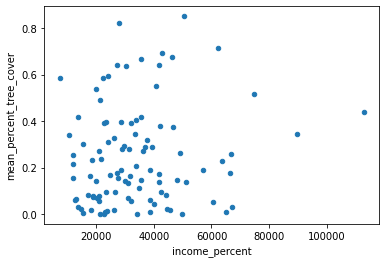

In [11]:
plotdf = urban_tree_canopy[urban_tree_canopy['income_percent'] <= 150000].sample(100) #otherwise the plot is so dense you can barely see anything
plotdf.plot.scatter(x = 'income_percent', y = 'mean_percent_tree_cover')

In [12]:
bardf = urban_tree_canopy[['income_group', 'mean_percent_tree_cover']]
print(bardf.groupby('income_group').mean())
#bardf = pd.DataFrame({'income group': [1, 2, 3, 4], 'mean percent tree cover': [bardf.groupby()]})
#bardf.plot.bar(x = 'income_group', y = 'mean_percent_tree_cover')

              mean_percent_tree_cover
income_group                         
1                            0.265623
2                            0.282720
3                            0.310838
4                            0.364317


In [13]:
tract_parkcover = pd.read_csv('/content/greenspace_data/percent_cover_tracts_with_buffer.txt')
tract_parkcover.sample(10)

,GEOID,STATEFP,COUNTYFP,pc_park
7111,6023010901,6,23,1.809
69613,53033005000,53,33,14.890
42015,35001004735,35,1,7.700
55517,42003490002,42,3,29.276
29343,24027606701,24,27,19.884
47582,37089931901,37,89,0.057
462,1031010700,1,31,0.344
20128,16049960100,16,49,95.779
69353,53063004000,53,63,8.192
16614,12101030410,12,101,0.000


In [14]:
print(tract_parkcover.isna().sum().sum())
tract_parkcover['pc_park'].describe() #probably lognormal, heavily skewed

0


count    72538.000000
mean         7.504563
std         11.674224
min          0.000000
25%          1.207000
50%          3.471000
75%          8.568000
max        100.000000
Name: pc_park, dtype: float64

In [15]:
import statsmodels.api as sm
from scipy import stats

tract = pd.read_csv('health_datasets/PLACES_2022_census_tract.csv', dtype={"LocationName": str})
cleantract = tract[tract['MeasureId'].isin(['MHLTH', 'DEPRESSION'])]
mhlthtract = cleantract[cleantract['MeasureId'] == 'MHLTH']
depressiontract = cleantract[cleantract['MeasureId'] == 'DEPRESSION']

depressiontract.sample(3)

,Year,StateAbbr,StateDesc,CountyName,CountyFIPS,LocationName,DataSource,Category,Measure,Data_Value_Unit,...,High_Confidence_Limit,TotalPopulation,Geolocation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,States,Counties
1260850,2020,NJ,New Jersey,Ocean,34029,34029731206,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,...,17.0,2384,POINT (-74.24951706 39.97261175),34029731206,HLTHOUT,DEPRESSION,CrdPrv,Depression,46.0,489.0
1038658,2020,MI,Michigan,Wayne,26163,26163565600,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,...,22.4,2299,POINT (-83.41825964 42.30503733),26163565600,HLTHOUT,DEPRESSION,CrdPrv,Depression,50.0,1345.0
945449,2020,MA,Massachusetts,Middlesex,25017,25017340000,BRFSS,Health Outcomes,Depression among adults aged >=18 years,%,...,19.2,2594,POINT (-71.09879715 42.42307175),25017340000,HLTHOUT,DEPRESSION,CrdPrv,Depression,25.0,1915.0


In [16]:
!cp -rf "/content/drive/MyDrive/Midwest Datathon 2023 Team 11/Datasets/zipcode_map_treecount.csv" . 

In [17]:
treeindex = pd.read_csv('zipcode_map_treecount.csv')
treeindex.sample(5)

,Unnamed: 0,tree_count,zipcode
142,142,399,43085.0
64,64,3,40264.0
199,199,65,43065.0
121,121,2,40321.0
144,144,64,43202.0


In [18]:
tract_parkcover['LocationName'] = tract_parkcover['GEOID'].astype(str)
tract_parkcover.drop(['GEOID'], axis=1)
tract_parkcover_depression = tract_parkcover.merge(right = depressiontract, on = 'LocationName', how = 'inner')[['LocationName','pc_park', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit']]
tract_parkcover_depression.sample(10)

,LocationName,pc_park,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
58191,56001962900,7.274,19.3,18.0,20.6
140,10005050405,4.494,16.9,16.0,17.9
36814,39035115400,5.550,27.1,25.8,28.4
3925,12127090500,3.040,22.4,21.3,23.8
4522,13261950800,1.094,19.3,18.7,20.0
16457,24013504201,15.491,17.6,16.7,18.4
39527,40143007900,1.717,22.7,21.6,24.0
33660,37089930402,0.121,22.2,20.8,23.7
26526,34003027000,2.503,15.8,15.0,16.9
42991,42101006600,7.292,21.0,20.1,22.1


In [19]:
urban_income = urban_tree_canopy[['income_percent', 'census_block', 'mean_percent_tree_cover']]
#convert to block to tract
us_blocks = pd.read_csv('/content/census_code_mappers/us_blocks.csv')

In [20]:
#urban_income.rename(columns = {'census_block':'block_geoid'}, inplace = True)
urban_income['cblockstr'] = urban_income['census_block'].astype(str) #up to and including 11th character is tract. All 15 gives block
urban_income['tract'] = urban_income.cblockstr.str[:11]
urban_income = urban_income.drop(['cblockstr'], axis=1)
urban_income.head(5)

<ipython-input-20-0e765cd61b9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_income['cblockstr'] = urban_income['census_block'].astype(str) #up to and including 11th character is tract. All 15 gives block
<ipython-input-20-0e765cd61b9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_income['tract'] = urban_income.cblockstr.str[:11]


,income_percent,census_block,mean_percent_tree_cover,tract
0,9249,4.715701e+14,0.170732,47157005000
1,9249,4.715701e+14,0.000000,47157005000
2,12071,4.715701e+14,0.050112,47157011400
3,7721,4.715701e+14,0.265038,47157011400
4,7721,4.715701e+14,0.045038,47157011400


In [21]:
tract_parkcover_depression.rename(columns = {'LocationName': 'tract'}, inplace = True)
inc_tree_park_dep = urban_income.merge(right = tract_parkcover_depression, on = 'tract', how = 'inner')
inc_tree_park_dep.head(5)

,income_percent,census_block,mean_percent_tree_cover,tract,pc_park,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,9249,4.715701e+14,0.170732,47157005000,1.273,23.3,22.0,24.6
1,9249,4.715701e+14,0.000000,47157005000,1.273,23.3,22.0,24.6
2,9249,4.715701e+14,0.436003,47157005000,1.273,23.3,22.0,24.6
3,9249,4.715701e+14,0.549440,47157005000,1.273,23.3,22.0,24.6
4,9249,4.715701e+14,0.519850,47157005000,1.273,23.3,22.0,24.6


In [22]:
from sklearn.metrics import r2_score
model = LinearRegression()
sample_df = inc_tree_park_dep[["mean_percent_tree_cover", "income_percent", "pc_park", "Data_Value"]]
sample_df['pcp1'] = sample_df['pc_park'] + 1
sample_df['logpcp'] = np.log(sample_df['pcp1'])

X = np.array(sample_df["income_percent"]).reshape(-1, 1)
Y = np.array(sample_df["Data_Value"]).reshape(-1, 1)
model.fit(X, Y)
print(model.coef_)
print(model.intercept_)
r_squared = model.score(X, Y)
print(r_squared)
#sample_df.sample(500).plot.scatter(x = 'income_percent', y = 'Data_Value')
#sample_df['mean_percent_tree_cover'].plot.hist()

[[-5.4920383e-05]]
[21.74836182]
0.09702034214152011


<ipython-input-22-11f72cce8726>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['pcp1'] = sample_df['pc_park'] + 1
<ipython-input-22-11f72cce8726>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['logpcp'] = np.log(sample_df['pcp1'])


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = inc_tree_park_dep[['income_percent', 'pc_park']]
y = inc_tree_park_dep[['Data_Value']]

y = y.rename(columns = {'Data_Value': 'Depression_Score'})
y = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf_model = RandomForestRegressor(n_estimators=100, max_features=0.2)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.2)

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test,pred)
print(y_test[:20])
print(pred[:20])
rmse = np.sqrt(mse)
print(rmse)

[18.3 20.3 14.8 25.2 20.7 20.7 20.9 12.8 12.9 24.  16.1 21.2 18.1 17.
 23.3 23.1 21.1 20.9 24.3 18.3]
[18.3 20.3 14.8 25.2 20.7 20.7 20.9 12.8 12.9 24.  16.1 21.2 18.1 17.
 23.3 23.1 21.1 20.9 24.3 18.3]
0.21805942181938526


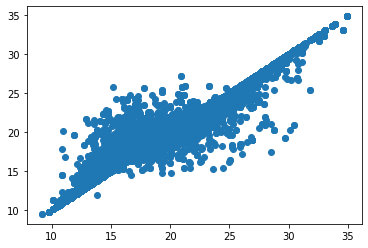

In [36]:
plt.scatter(x=y_test, y=pred)

In [25]:

importances = rf_model.feature_importances_
columns = X.columns
i=0
while i<len(columns):
  print(f"The importance of feature '{columns[i]}' is {importances[i]*100}%")
  i+=1

The importance of feature 'income_percent' is 54.02546148845684%
The importance of feature 'pc_park' is 45.974538511543166%


In [29]:
from sklearn.tree import DecisionTreeRegressor 
X = np.array(inc_tree_park_dep[['pc_park']]).reshape(-1,1)
y = np.array(inc_tree_park_dep[['Data_Value']]).reshape(-1,1)
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

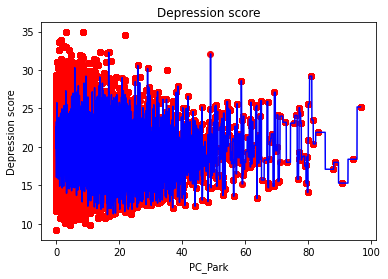

In [31]:
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Depression score') 
  
# specify X axis label
plt.xlabel('PC_Park')
  
# specify Y axis label
plt.ylabel('Depression score')
  
# show the plot
plt.show()

In [38]:
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree_2.dot',
               feature_names =['income_percent'])


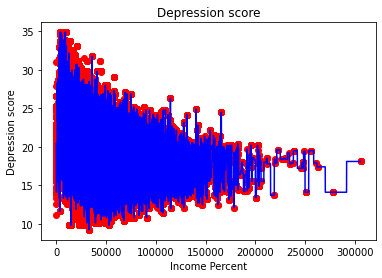

In [34]:
from sklearn.tree import DecisionTreeRegressor 
X = np.array(inc_tree_park_dep[['income_percent']]).reshape(-1,1)
y = np.array(inc_tree_park_dep[['Data_Value']]).reshape(-1,1)
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X, y)
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Depression score') 
  
# specify X axis label
plt.xlabel('Income Percent')
  
# specify Y axis label
plt.ylabel('Depression score')
  
# show the plot
plt.show()

In [ ]:
#Linear regression, y = depression score, X = []
Xdf = inc_tree_park_dep[['income_percent', 'pc_park']]
ydf = inc_tree_park_dep[['Data_Value']]
ydf = ydf.rename(columns = {'Data_Value': 'Depression_Score'})

X = np.array(Xdf)
y = np.array(ydf)

In [ ]:
lm = LinearRegression()
lm.fit(X, y)
print(lm.coef_)
print(lm.intercept_)
lm.score(X, y)

In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                 6.088e+04
Date:                Sat, 11 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:29:31   Log-Likelihood:            -4.0788e+06
No. Observations:             1588318   AIC:                         8.158e+06
Df Residuals:                 1588314   BIC:                         8.158e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7760      0.006   3577.034      0.0

In [ ]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2)
lm = LinearRegression()
lm.fit(X_tr, y_tr)
print(lm.coef_)
print(lm.intercept_)
print(lm.score(X, y))
print()

y_pr = lm.predict(X_te)
print(np.mean((lm.predict(X_tr)-y_tr)**2)**0.5) #training error linear regression model
print(np.mean((y_pr-y_te)**2)**0.5) #RMSE
print(y_pr)
print('-----')
print(y_te)

ValueError: ignored